# Data and AI Democratization through PromptToQueryResult Function

In the context of data and AI democratization, `PromptToQueryResult` could be a function that translates natural language prompts into database queries. This could be part of a larger system that allows non-technical users to interact with databases using natural language, which would democratize access to data and AI.

## Business Value and Domain Problem Solutions

### Business Value:

- **Increased Efficiency:** Non-technical users can retrieve data without needing to learn SQL or other query languages, or without needing to wait for technical staff to retrieve the data for them.
- **Reduced Costs:** Less time and resources are spent on training staff to use complex database systems, and less time is spent on data retrieval tasks by technical staff.
- **Improved Decision Making:** With easier access to data, decision-making can be data-driven and timely, leading to better business outcomes.

### Domain Problem Solved:

- **Data Accessibility:** One of the challenges in data democratization is making data accessible to non-technical users. `PromptToQueryResult` could help solve this problem by providing a natural language interface to databases.
- **AI Democratization:** By using AI to translate natural language prompts into database queries, `PromptToQueryResult` could also contribute to AI democratization. It could be part of a system that allows users to leverage the power of AI without needing to understand the technical details.

## Implementation Details

The selected code is written in Python and it's part of a larger program that uses a plugin-based architecture. The code is using a kernel object to manage plugins and their functions.

- **Variable Definitions:** First, two variables are defined: `plugins_directory` and `file_path`. The `plugins_directory` variable is set to the string `"plugins"`, which is presumably the directory where the plugins are stored. The `file_path` variable is set to `"data_schema.txt"`, which is likely a file that contains a data schema.

- **Reading Data Schema:** The `read_data_schema_from_file` function is then called with `file_path` as an argument. This function reads the data schema from the specified file and returns it as a string. The returned data schema is stored in the `data_schema` variable.

- **Conditional Plugin Import:** Next, there's an if-statement that checks the `prompt_rephrase` variable. If `prompt_rephrase` is true, the code imports a plugin named `"PromptPlugin"` from the plugins directory using the `import_plugin_from_prompt_directory` method of the kernel object. This method returns a dictionary-like object of functions provided by the plugin. The `"PromptRephraser"` function from the `"PromptPlugin"` plugin is then stored in the `rephraserFunction` variable.

- **Function Invocation:** The `rephraserFunction` is then invoked asynchronously using the `invoke` method of the kernel object. The `invoke` method is called with two arguments: the function to be invoked and a `KernelArguments` object that contains the data schema and a query. The result of the function invocation is stored in the `rephrased_prompt` variable.

- **Importing Another Plugin:** Finally, the code imports another plugin named `"DataPlugin"` from the plugins directory and stores the `"DatabaseDescriptor"` function from this plugin in the `descriptorFunction` variable. This function can presumably be used later in the code to describe a database based on the data schema.


In [1]:
from main import GenerateQuestions
from main import ReadQuestionsAndGenerateAnswers
from main import PromptToQueryResult
from services import Service

In [ ]:
await GenerateQuestions()

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2024-06-23.txt", selectedService=Service.HuggingFace, debug=False)

Claude API Request: [{'role': 'user', 'content': "Below, you'll find a comprehensive breakdown of the data schema, including detailed descriptions of each table in a relational database. \nAdditionally, there are sample SQL queries provided along with explanations, as well as descriptions of various chart types and Python code snippets demonstrating how to generate them. \nFeel free to request specific queries or Python code for your user interactions.\n\nData Schema:\nTable: brands\nbrand_id: INTEGER - Unique identifier for each brand.\nbrand_name: VARCHAR - Name of the brand.\nSample Data for brands\nbrand_id\tbrand_name\n1\tElectra\n2\tHaro\nThis table stores information about different brands. Each brand has a unique identifier (brand_id) and a name (brand_name).\n\nTable: categories\ncategory_id: INTEGER - Unique identifier for each category.\ncategory_name: VARCHAR - Name of the category.\nSample Data for categories\ncategory_id\tcategory_name\n1\tChildren Bicycles\n2\tComfort Bi

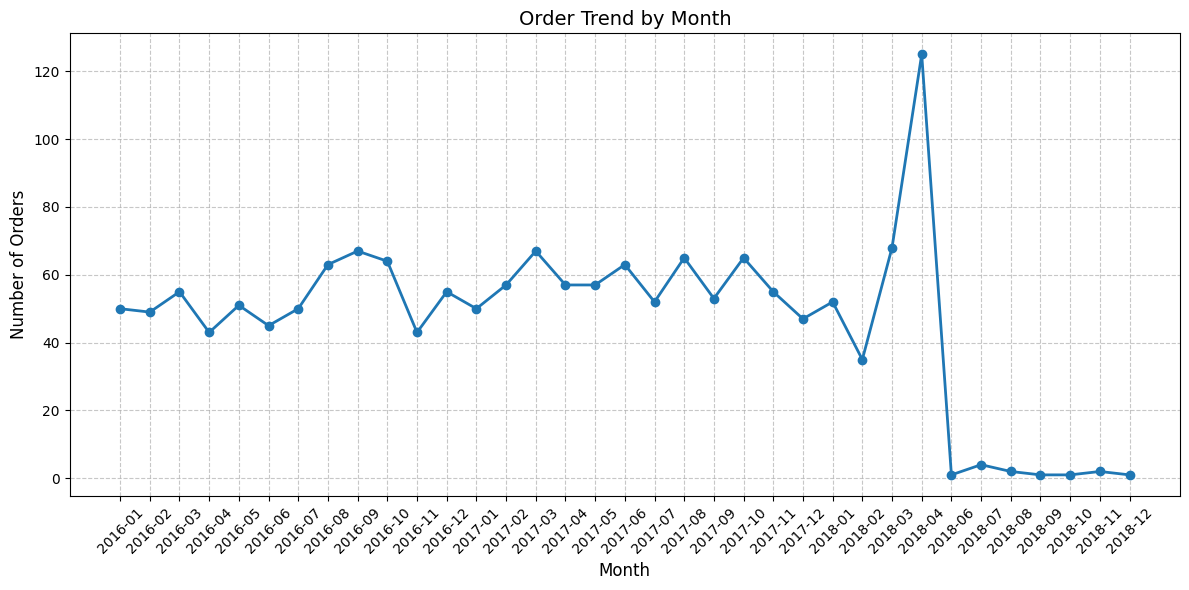

,order_month,order_count
0,2016-01,50
1,2016-02,49
2,2016-03,55
3,2016-04,43
4,2016-05,51
5,2016-06,45
6,2016-07,50
7,2016-08,63
8,2016-09,67
9,2016-10,64


In [29]:
await PromptToQueryResult(prompt_rephrase=False, debug=True ,selected_service=Service.ClaudeAI, huggingface_model="Llama318BInstruct", model_mode="chat")


Rephrased prompt: order quantity trend by month#


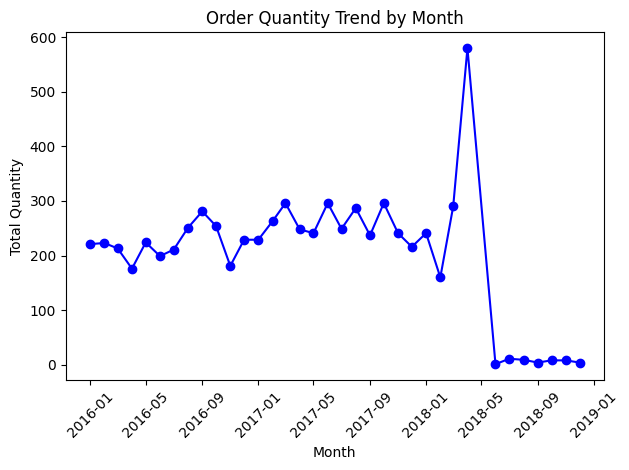

,order_month,total_quantity
0,2016-01-01,221
1,2016-02-01,223
2,2016-03-01,213
3,2016-04-01,176
4,2016-05-01,224
5,2016-06-01,199
6,2016-07-01,211
7,2016-08-01,251
8,2016-09-01,281
9,2016-10-01,254


In [28]:
await PromptToQueryResult(prompt_rephrase=False, debug=False ,selected_service=Service.AzureOpenAI, huggingface_model="Llama318BInstruct", model_mode="chat")

HuggingFace API Request: [{'role': 'user', 'content': "We implemented a sql and python code generator based on database schema and user prompt. \nA large language model deployed and we embed user's prompt into a template and genarate sql and python code based on the data schema provided below, \nbut users can not write good prompts so we need to rephrase and guess their intents and rewrite their prompts in a better way.  \n\nData Schema:\nTable: brands\nbrand_id: INTEGER - Unique identifier for each brand.\nbrand_name: VARCHAR - Name of the brand.\nSample Data for brands\nbrand_id\tbrand_name\n1\tElectra\n2\tHaro\nThis table stores information about different brands. Each brand has a unique identifier (brand_id) and a name (brand_name).\n\nTable: categories\ncategory_id: INTEGER - Unique identifier for each category.\ncategory_name: VARCHAR - Name of the category.\nSample Data for categories\ncategory_id\tcategory_name\n1\tChildren Bicycles\n2\tComfort Bicycles\nThis table stores infor

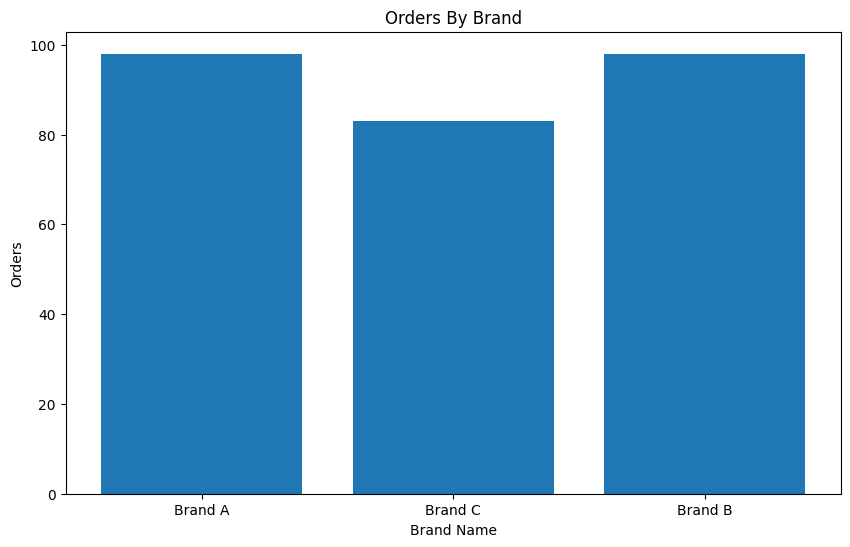

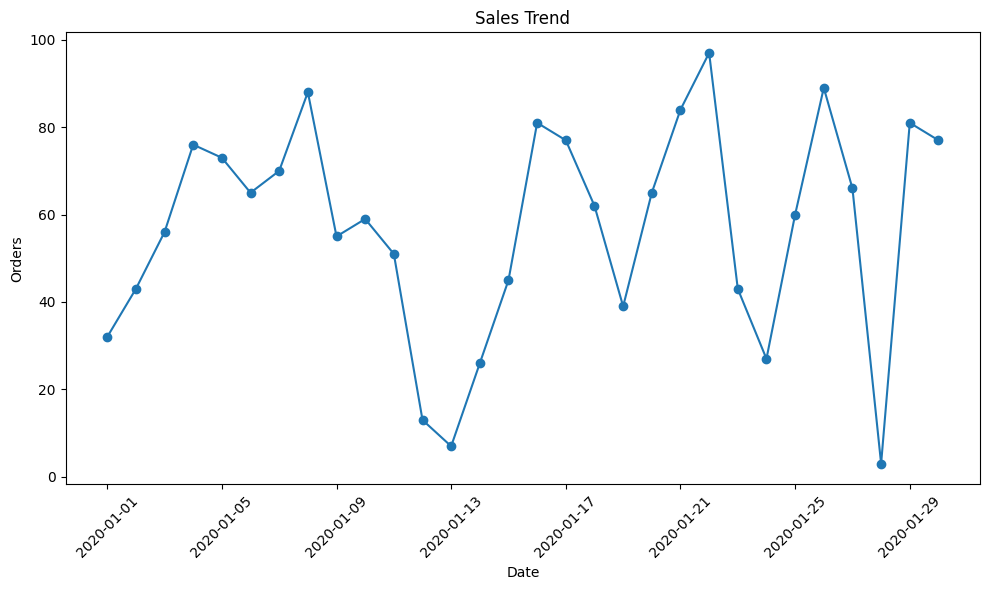

,brand_name,brand_id,order_date,order_id,revenue,orders
0,Haro,2,2016-01-03,4,1349.9820,1
1,Haro,2,2016-01-14,18,1199.9840,1
2,Haro,2,2016-01-18,26,599.9920,1
3,Haro,2,2016-02-05,59,674.9910,1
4,Haro,2,2016-02-09,66,599.9920,1
...,...,...,...,...,...,...
743,Trek,9,2017-12-17,1305,2789.9907,1
744,Trek,9,2017-12-20,1306,5579.9814,1
745,Trek,9,2018-03-01,1411,2699.9910,1
746,Trek,9,2018-04-23,1573,2849.9905,1


In [27]:
await PromptToQueryResult(prompt_rephrase=True, debug=True ,selected_service=Service.HuggingFace, huggingface_model="Llama318BInstruct", model_mode="chat")